<a href="https://colab.research.google.com/github/18K41A0432preethi/Deep-Learning-Projects/blob/main/Age_gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
sns.set()

from keras.models import Sequential
from keras.layers import Conv2D, Dropout, BatchNormalization, Flatten, Dense, MaxPooling2D

from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam

from sklearn.metrics import mean_absolute_error,mean_squared_error, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [ ]:
data = pd.read_csv('/content/age_gender.csv')

In [ ]:
data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,23705.0,33.300907,19.885708,1.0,23.0,29.0,45.0,116.0
ethnicity,23705.0,1.269226,1.345638,0.0,0.0,1.0,2.0,4.0
gender,23705.0,0.477283,0.499494,0.0,0.0,0.0,1.0,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


In [ ]:
data.isna().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



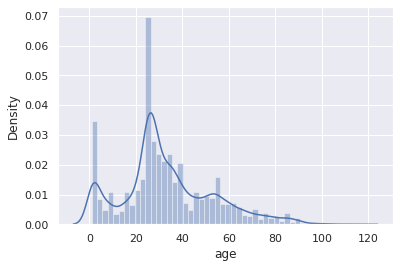

In [ ]:
sns.distplot(data['age']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



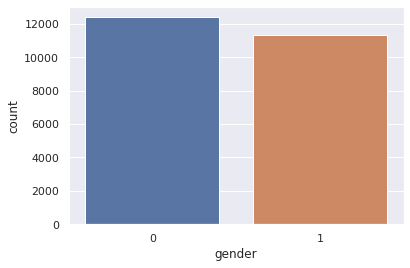

In [ ]:
sns.countplot(data['gender']);

In [ ]:
import plotly.graph_objects as go

In [ ]:
df_ethnicity=data['ethnicity'].value_counts().to_frame().reset_index().rename(columns={'index':'ethnicity','ethnicity':'count'})

colors=['cyan','royalblue','blue','darkblue',"darkcyan"]
fig = go.Figure([go.Pie(labels=df_ethnicity['ethnicity'], values=df_ethnicity['count'])])
fig.update_traces(hoverinfo='label+percent', textinfo='percent+value', textfont_size=15,
                 marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title="Ethnicity Distribution",title_x=0.5)
fig.show()

In [ ]:
df_gender=data['gender'].value_counts().to_frame().reset_index().rename(columns={'index':'gender','gender':'count'})


fig = go.Figure([go.Pie(labels=df_gender['gender'], values=df_gender['count'])])
fig.update_layout(title="Gender Count",title_x=0.5)
fig.show()

In [ ]:

data['pixels'] = data['pixels'].map(lambda x: np.array(x.split(' '), dtype=np.float32).reshape(48,48))

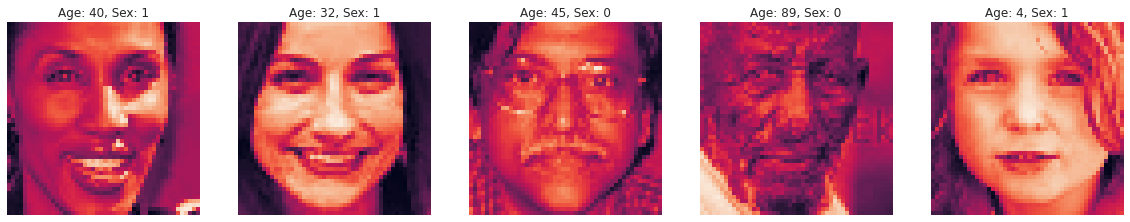

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20, 10))

for i in range(5):
    random_face = np.random.choice(len(data))
    
    age = data['age'][random_face]
    gender = data['gender'][random_face]
    
    axes[i].set_title('Age: {0}, Sex: {1}'.format(age,gender))
    axes[i].imshow(data['pixels'][random_face])
    axes[i].axis('off')

In [ ]:
# Reshape images for CNN
X = np.array(data['pixels'].to_list())
X_reshaped = X.reshape(X.shape[0], 48, 48, 1)

In [ ]:
# Normalise images fromt he data
if np.max(X_reshaped) > 1: X_reshaped = X_reshaped / 255

In [ ]:
# getting the some significant variables
input_shape = X_reshaped.shape[1:] 

n_epochs = 10
batch_size = 64

In [ ]:

y = data['age'].values

In [ ]:
# splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

In [ ]:
age_model = Sequential()

age_model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(BatchNormalization())

age_model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
age_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(Dropout(0.3))
age_model.add(BatchNormalization())

age_model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
age_model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(Dropout(0.3))
age_model.add(BatchNormalization())

age_model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(Dropout(0.5))
age_model.add(BatchNormalization())

age_model.add(Flatten())
age_model.add(Dense(128, activation='relu'))
age_model.add(Dropout(0.4))
age_model.add(Dense(1,activation='relu'))

age_model.compile(optimizer='adam', loss='mse')

age_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 23, 23, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 128)       0

In [ ]:
# Callbacks for age model
callbacks = [EarlyStopping(patience=4, monitor='val_loss', mode='min'), 
             ReduceLROnPlateau(patience=2, verbose=1)]

In [ ]:

history = age_model.fit(X_train, y_train, 
                        epochs=n_epochs,
                        batch_size=batch_size,
                        callbacks=callbacks,
                        validation_data=(X_test, y_test))

Epoch 1/10
297/297 [==============================] - 581s 2s/step - loss: 386.4218 - val_loss: 2648.4746
Epoch 2/10
297/297 [==============================] - 560s 2s/step - loss: 149.8697 - val_loss: 791.7192
Epoch 3/10
297/297 [==============================] - 556s 2s/step - loss: 122.9892 - val_loss: 167.5077
Epoch 4/10
297/297 [==============================] - 555s 2s/step - loss: 109.5729 - val_loss: 93.0071
Epoch 5/10
297/297 [==============================] - 556s 2s/step - loss: 103.1311 - val_loss: 123.1591
Epoch 6/10
297/297 [==============================] - 571s 2s/step - loss: 91.2670 - val_loss: 107.5144

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 7/10
297/297 [==============================] - 563s 2s/step - loss: 77.7858 - val_loss: 70.0185
Epoch 8/10
297/297 [==============================] - 563s 2s/step - loss: 72.2669 - val_loss: 69.8126
Epoch 9/10
297/297 [==============================] - 565s 2s/step - loss: 68.1120 

TypeError: ignored

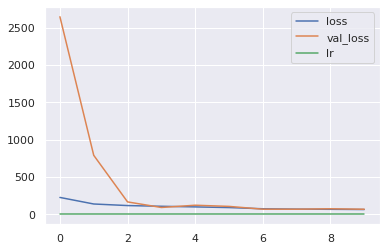

In [ ]:

pd.DataFrame(history.history).plot();

In [ ]:
# Make predictionson test data 
y_pred = age_model.predict(X_test)

In [ ]:
# Mean absolute error
print("MAE: {}".format(mean_absolute_error(y_test, y_pred)))
# Accuracy
print("MSE: {}".format(mean_squared_error(y_test, y_pred)))

MAE: 5.928972743352589
MSE: 69.44697502783677


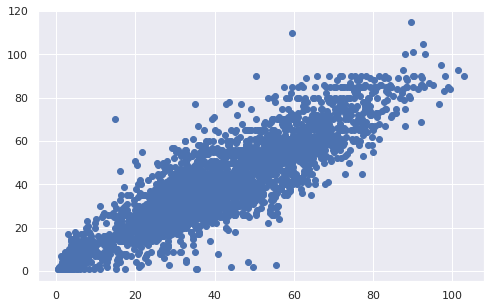

In [ ]:
# Distribution of the data
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, y_test);

In [ ]:
y = data['gender'].values

# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

In [ ]:
# Building the model

gender_model = Sequential()

gender_model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
gender_model.add(MaxPooling2D(pool_size=(2,2)))
gender_model.add(BatchNormalization())

gender_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
#gender_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
gender_model.add(MaxPooling2D(pool_size=(2,2)))
gender_model.add(Dropout(0.4))
gender_model.add(BatchNormalization())

gender_model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
gender_model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
gender_model.add(MaxPooling2D(pool_size=(2,2)))
gender_model.add(Dropout(0.5))
gender_model.add(BatchNormalization())

gender_model.add(Flatten())

gender_model.add(Dense(64, activation='relu'))
gender_model.add(Dropout(0.4))

gender_model.add(Dense(1, activation='sigmoid')) #For binary classification activation function is sigmoid 

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #...and loss function is binary_crossentropy

gender_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 23, 23, 64)        256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 10, 128)       0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 10, 10, 128)      

In [ ]:
# Callbacks for gender model
callbacks1 = [EarlyStopping(patience=4, monitor='val_accuracy', mode='max'), 
              ReduceLROnPlateau(patience=2, verbose=1)]

In [ ]:

history1 = gender_model.fit(X_train, y_train, 
                           epochs=n_epochs,
                           batch_size=batch_size,
                           callbacks=callbacks,
                           validation_data=(X_test, y_test))

Epoch 1/10
297/297 [==============================] - 253s 845ms/step - loss: 0.6132 - accuracy: 0.7025 - val_loss: 1.6086 - val_accuracy: 0.5206
Epoch 2/10
297/297 [==============================] - 250s 843ms/step - loss: 0.3789 - accuracy: 0.8241 - val_loss: 0.3470 - val_accuracy: 0.8405
Epoch 3/10
297/297 [==============================] - 254s 856ms/step - loss: 0.3307 - accuracy: 0.8561 - val_loss: 0.2931 - val_accuracy: 0.8747
Epoch 4/10
297/297 [==============================] - 248s 836ms/step - loss: 0.3020 - accuracy: 0.8658 - val_loss: 0.2840 - val_accuracy: 0.8713
Epoch 5/10
297/297 [==============================] - 248s 834ms/step - loss: 0.2767 - accuracy: 0.8767 - val_loss: 0.2680 - val_accuracy: 0.8838
Epoch 6/10
297/297 [==============================] - 249s 838ms/step - loss: 0.2660 - accuracy: 0.8853 - val_loss: 0.2631 - val_accuracy: 0.8829
Epoch 7/10
297/297 [==============================] - 247s 831ms/step - loss: 0.2518 - accuracy: 0.8863 - val_loss: 0.2433 -

In [ ]:
# Metrics evaluation
valid_score = gender_model.evaluate(X_test, y_test, verbose=1)
print('Accuracy for test set: {0}'.format(valid_score[1]))

149/149 [==============================] - 14s 97ms/step - loss: 0.2327 - accuracy: 0.9038
Accuracy for test set: 0.9038177728652954


In [ ]:
y_pred = gender_model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      2468
           1       0.89      0.91      0.90      2273

    accuracy                           0.90      4741
   macro avg       0.90      0.90      0.90      4741
weighted avg       0.90      0.90      0.90      4741



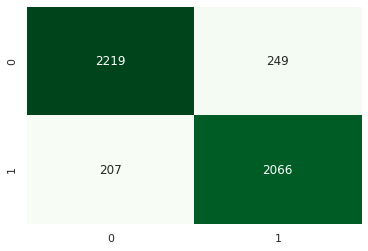

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='Greens', cbar=False, annot=True, fmt='d');

In [ ]:
y_pred = y_pred.reshape(y_pred.shape[0])

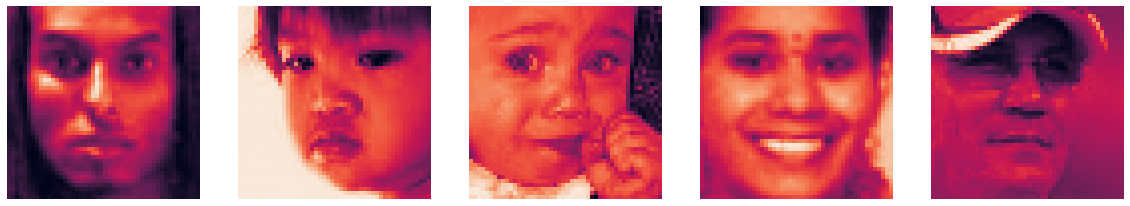

In [ ]:
# Model predict is female, but actually it's male

X_fp = X_test[(y_pred == 1) & (y_test == 0)] 

fig, axes = plt.subplots(1, 5, figsize=(20, 10))

for i in range(5):
    
    random_choice = np.random.choice(len(X_fp))
    
    axes[i].imshow(X_fp[random_choice].reshape(48, 48))
    axes[i].axis('off')

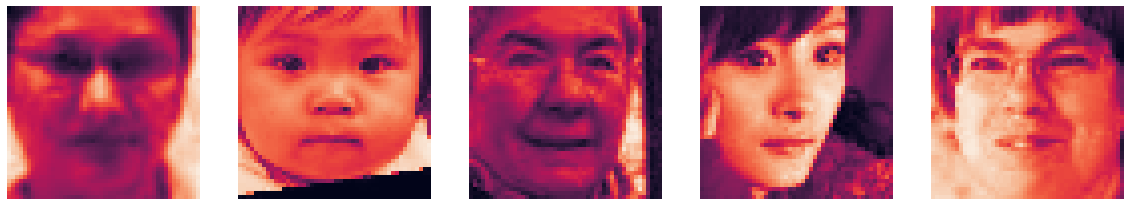

In [ ]:
# Model predict is male, but actually it's female

X_fn = X_test[(y_pred == 0) & (y_test == 1)]  

fig, axes = plt.subplots(1, 5, figsize=(20, 10))

for i in range(5):
    
    random_choice = np.random.choice(len(X_fn))
    axes[i].imshow(X_fn[random_choice].reshape(48, 48))
    axes[i].axis('off')

In [ ]:
def face_prediction(image):
    
    x = image.reshape(1, 48, 48, 1)
    x = x / 255
    
    age_predict = int(age_model.predict(x))
    gender_predict = int(gender_model.predict_classes(x))
    
    gender = {0: 'Male', 1: 'Female'}
    
    plt.imshow(image)
    plt.title('Age:{0}, Sex:{1}'.format(age_predict, gender[gender_predict]))
    plt.axis('off')

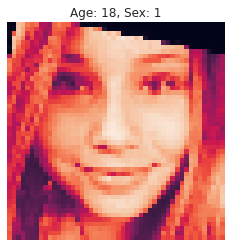

In [ ]:
# Final check
random_face = np.random.choice(len(data))

age = data['age'][random_face]
gender = data['gender'][random_face]

plt.imshow(data['pixels'][random_face])
plt.title('Age: {0}, Sex: {1}'.format(age, gender))
plt.axis('off');

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



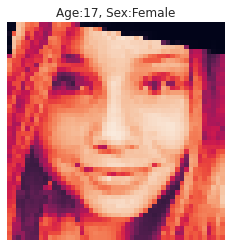

In [ ]:
face_prediction(data['pixels'][random_face])

In [ ]:
import Image
image = Image.open('preethireddy.jpeg')
image_data = np.asarray(image)
 for i in range(len(image_data)):
   for j in range(len(image_data[0])):
     print(image_data[i][j])

In [ ]:
def face_prediction(image):
    
    x = image.reshape(1, 48, 48, 1)
    x = x / 255
    
    age_predict = int(age_model.predict(x))
    gender_predict = int(gender_model.predict_classes(x))
    
    gender = {0: 'Male', 1: 'Female'}
    
    plt.imshow(images)
    plt.title('Age:{0}, Sex:{1}'.format(age_predict, gender[gender_predict]))
    plt.axis('off')